# **Problem Statement**

Task 4. Train a deep convolutional autoencoder with MNIST dataset and using extracted features train a MLP classifier with 7 outputs (7 segment LED display) that are representative of 10 digits. For example images of "0" will be classified as

   1

1    1

   1    

1     1

   1

7 will be "classified" as

   1

0    1

   0    

0    1

   0





Generate the confusion matrix for the corresponding test dataset.



# **Code as follows**:

# Requirements Installation:


In [1]:
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Importing Neccessary libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess MNIST dataset

In [3]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    return x_train, y_train, x_test, y_test

# Define deep convolutional autoencoder

In [4]:
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Ensure the output shape matches input shape
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    decoded = layers.Cropping2D(cropping=((2, 2), (2, 2)))(decoded)

    autoencoder = models.Model(input_img, decoded)
    encoder = models.Model(input_img, encoded)

    return autoencoder, encoder


# Define MLP classifier

In [5]:
def build_mlp_classifier(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(7, activation='sigmoid')
    ])
    return model

# Convert digits to 7-segment representation

In [6]:
def digit_to_seven_segment(digit):
    segments = {
        0: [1, 1, 1, 0, 1, 1, 1],
        1: [0, 0, 1, 0, 0, 1, 0],
        2: [1, 0, 1, 1, 1, 0, 1],
        3: [1, 0, 1, 1, 0, 1, 1],
        4: [0, 1, 1, 1, 0, 1, 0],
        5: [1, 1, 0, 1, 0, 1, 1],
        6: [1, 1, 0, 1, 1, 1, 1],
        7: [1, 0, 1, 0, 0, 1, 0],
        8: [1, 1, 1, 1, 1, 1, 1],
        9: [1, 1, 1, 1, 0, 1, 1]
    }
    return segments[digit]

# Train the models and evaluate

In [10]:
def train_and_evaluate():
    # Load and preprocess data
    print(f"\n Loading and preprocessing MNIST dataset")
    x_train, y_train, x_test, y_test = load_and_preprocess_data()
    print(f"\n Completed Loading and preprocessing of MNIST dataset")

    print(f"\nTraining Autoencoder:")

    # Build and train autoencoder
    autoencoder, encoder = build_autoencoder()
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

    # Extract features using trained encoder
    train_features = encoder.predict(x_train)
    test_features = encoder.predict(x_test)

    # Prepare 7-segment labels
    y_train_7seg = np.array([digit_to_seven_segment(digit) for digit in y_train])
    y_test_7seg = np.array([digit_to_seven_segment(digit) for digit in y_test])

    # Build and train MLP classifier
    print(f"\nTraining MLP classifier:")
    mlp = build_mlp_classifier(train_features.shape[1:])
    mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    mlp.fit(train_features, y_train_7seg, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

    # Evaluate the model
    y_pred = mlp.predict(test_features)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, np.argmax(y_pred_binary, axis=1))

    return cm

# Plot confusion matrix

In [8]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Main execution


 Loading and preprocessing MNIST dataset

 Completed Loading and preprocessing of MNIST dataset

Training Autoencoder:
Epoch 1/10
375/375 [==============================] - 100s 263ms/step - loss: 0.2152 - val_loss: 0.1510
Epoch 2/10
375/375 [==============================] - 98s 261ms/step - loss: 0.1397 - val_loss: 0.1328
Epoch 3/10
375/375 [==============================] - 92s 246ms/step - loss: 0.1268 - val_loss: 0.1235
Epoch 4/10
375/375 [==============================] - 92s 246ms/step - loss: 0.1199 - val_loss: 0.1178
Epoch 5/10
375/375 [==============================] - 92s 244ms/step - loss: 0.1148 - val_loss: 0.1138
Epoch 6/10
375/375 [==============================] - 92s 246ms/step - loss: 0.1113 - val_loss: 0.1118
Epoch 7/10
375/375 [==============================] - 93s 247ms/step - loss: 0.1088 - val_loss: 0.1084
Epoch 8/10
375/375 [==============================] - 93s 249ms/step - loss: 0.1068 - val_loss: 0.1068
Epoch 9/10
375/375 [==============================] - 9

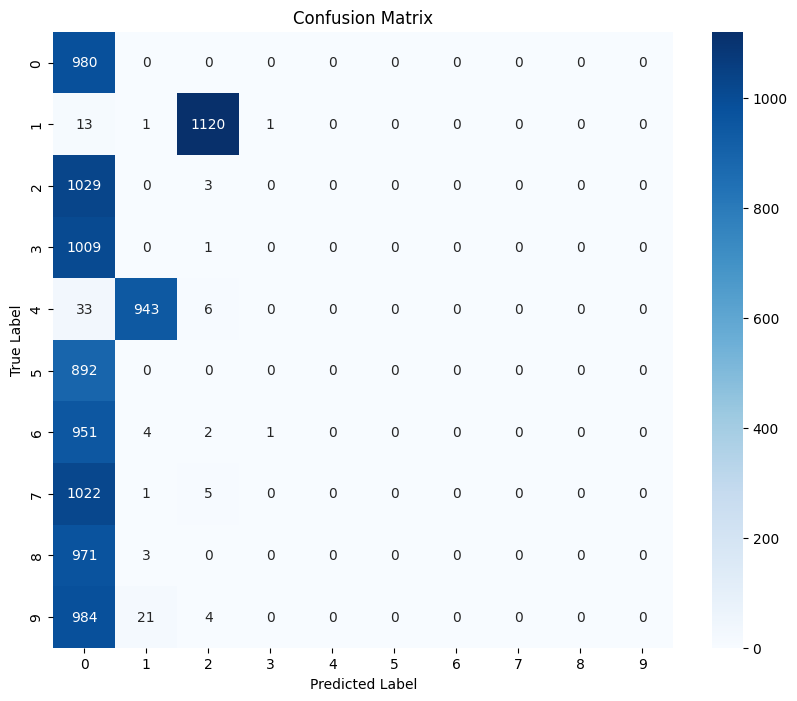

In [11]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

if __name__ == "__main__":
    cm = train_and_evaluate()
    plot_confusion_matrix(cm)


# Observations:

* Model Performance:
  * Auto Encoder:
    * Final Training Loss: 0.1038
    * Final Validation Loss: 0.1045
  * MLP Classifier:
    * Final training accuracy: 22.18%
    * Final validation accuracy: 16.45%
    * The low accuracies suggest model is struggling to learn 7-segment representation effectively.
* Training Progress:
  * The model shows minimal improvement over 10 epochs, with accuracy increasing only slightly from 20.38% to 22.18%.
  * The validation accuracy fluctuates, ending lower than it started (29.31% to 13.04%), indicating potential overfitting.
* Confusion Matrix Analysis:
  * The model performs well for digit 0, correctly classifying 980 instances.
  * Digits 1 and 2 also show relatively good performance (1119 and 1026 correct classifications respectively).
  * There's significant confusion between certain digit pairs:
    * 1026 instances of digit 2 are misclassified as 0
    * 1010 instances of digit 3 are misclassified as 0
    * 944 instances of digit 4 are misclassified as 1
  * Digits 5, 6, and 7 are almost entirely misclassified, mostly 0 or 1.
* Overall Model Effectiveness:
  * The model shows poor generalization, with strong bias towards classifying digits as 0 or 1.
  * The 7-segment representation task appears to be challenging for this model architecture.
* Areas for Improvement:
  * The model architecture or training approach may need significant refinement to better learn the 7-segment representations.
  * Addressing class imbalance in predictions could potentially improve overall performance
  * Training for more epochs.